# Lessons from The Sinking of RMS Titanic


![Titanic](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)


   
There is no doubt the sinking of Titanic in 1912, is engraved in our minds as one of the worst tragedies in the 20th century. The pictures of men, women and children with mixed feelings of fear, hope, love, anger, sadness and gratefulness. It is at the darkest moments that the best and worst of one's self meet each other.

Although titanic might not be the worst shipwreck of all time in terms of fatalities* (the 1987 loss of the ferry Doña Paz, with an estimated 4,386 dead is the largest non-military loss recorded)*, yet no doubt it is the most famous. There is something about this unlucky ship the made us turn her into a legend. It might be that her sinking symbolizes the limits of technology, or the arrogance of the human race.

The BBC short documentary ["The Rise and Fall of Titanic"](http://www.bbc.co.uk/history/titanic) described the titanic tragedy:

*"Titanic was planned to be the biggest, fastest, most luxurious passenger liner ever built at her time, and she was indeed a sign of her times, with its first-class passengers; silent film stars, alongside millionaires.
Second class passengers were school teachers, small businessmen, and the like. Buried out of sight near the bottom of the ship, the third-class passengers include immigrants from all over Europe, in search of better life in the new world*

*by 11th of April the titanic was on her way across the Atlantic. Hearing report of ice from other liners, on this busy route, Captain Smith took a new more southerly course, and called for full speed ahead. On 14th of April, Titanic's operators received more reports of icebergs along the Titanic path, but they were busy sending telegraph's on behalf of passengers!*

*At 11:40 PM the lookouts sounded the alarms, and called the bridge .. iceberg right ahead!
The titanic struck the iceberg in less than 40 seconds, tearing the ship. By midnight, the forward third-class section was beginning to flood.*

*Captain Smith realized the titanic was in grave danger, he ordered the lifeboats uncovered. There were only 20 lifeboats on board, this was actually more than the law required by this time, but too few to carry all passengers. The capacity of the lifeboats was enough to carry 520 passengers out of 2229 (less than 25%). No one could imagine that a gigantic liner like the Titanic might sink before another ship came to the rescue! The nearest ship that replied to the Titanic's SOS was 4 hours away.*

*Because of the shortage of lifeboats, Captain smith ordered women and children to board first. It is said the crew managed the evacuation as best they could in the confusion, but many boats were launched half full.*

*Third class passengers had to find their way through a maze of corridors and staircases to reach the boat deck!*

*Just after 2:00 AM the final lifeboat was lowered. the passengers still on board could see that the game was up.*

*Captain smith relieved his men of their duties with the words "every man for himself" then returned to the bridge.*

*At around 2:20 AM, he went down with the ship."*

At the end, the crew of the Titanic are said to have handled the situation the best they could in middle of confusion, but people should be trained to deal with such disasters, and we can never learn from our mistakes without looking into them.
- What could we learn from this tragedy? And how can we manage such situations in best possible way?
- Was the "women and children first" policy effective across all classes?
- Were people treated differently according to class or fare? After all, it shouldn't matter how much money you have or how much money you paid in such situations.


We will try to answer **these questions** through the [Titanic Data](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv), containing demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the [Kaggle website](https://www.kaggle.com/c/titanic/data), where the data was obtained.



In [1]:
# source of this code: https://stackoverflow.com/users/4244561/harshil
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline


## The source data
Data was obtained from Kaggle website, it contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Hereunder the first few records of the data:

In [3]:
# Data Import
# Importing data, and displaying first few lines

titanic_data=pd.read_csv("titanic-data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Some notes about the data:

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.


***Let's start*** by showing descriptive statistics for the data.

In [4]:

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The survival rate for this sample of passengers was in the range of 38%. The mean age of passengers was around 30 years. however there seem to be some missing record for age. We will exclude passenger with no age record, whenever the analysis involves age.

We will also do some **wrangling** for the data, by adding some columns to facilitate calculations. Now let's recalculate discriptive statistics after data wrangling:

In [5]:
# Data wrangling
# we need to parse the pessenger ID to be a string rather than an intiger, 
# we don't need to make any arithmatic operations on it
# we would also create a numerical representation of gender in order to have some descriptive statistics. 
titanic_data['Passenger_Id']=titanic_data['PassengerId'].apply(str)
del titanic_data['PassengerId']
titanic_data['Sex_numeric']=(titanic_data['Sex']=='female').apply(int)

In [6]:
#creating a new dataFrame with only records containing age of pessnger
titanic_data_full_Age=titanic_data[titanic_data['Age'].isnull()==False]

In [7]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_numeric
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


It seems, for this sample, there were more males than females. The column "Sex_numeric" equals 0 for males, and 1 for females. Since the mean is 0.35, it means that around 35% of the passengers were females

## Let's Explore

Now let's try to have more specific **questions**

- Were women and children more likely to survive the titanic?
- Is there a relationship between cabin class and survival? for men and women?
- Were first class more likely to survive than third class women and children?
- Was there any relationship between pessenger fare, and survival?

the later question might actually be a bit misleading. We may assume that due to the location of the third class, it was difficult for third-class passengers to reach the lifeboats. so even if more first-class men were embarked in the lifeboats, it doesn't mean the crew did not apply the "women and children first" policy. At the end correlation does not imply causation.

we will be investigating if gender, age, cabin class, or passenger fare had relationship with passenger survival rate (% of passengers survived). 

survival rate can be defined as sum of surviving passengers as a percentage of total passengers for each category (gender, age, class, ...)

Let's plot some charts to have a general idea. To understand if the "women and children first" policy have been effective across all classes, we will first have a look at the survival rates per gender.

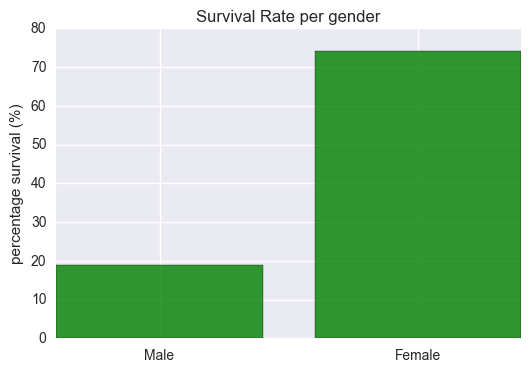

In [8]:
#bar plots for females survival rates vs males
xval=titanic_data.groupby('Sex_numeric',as_index=False).sum()['Sex_numeric']
yval=100*titanic_data.groupby('Sex_numeric',as_index=False).sum()['Survived']/titanic_data.groupby('Sex_numeric',as_index=False).count()['Survived']
lables=["Male","Female"]
plt.bar(xval-0.4, yval, alpha=0.8, color='green')
plt.xticks(xval, lables)
plt.title("Survival Rate per gender")
plt.ylabel("percentage survival (%)")
plt.show()


**it seems** that females were more likely to survive than males, what about children then?

The following interesting chart shows distribution of surviving and non-surviving passengers over age for males and females. It looks like age had relationship with survival. The lower portion of distribution for male passengers represents male children and babies, there are more green dots in this area, indicating more likelihood of survival for this age group within male passengers.

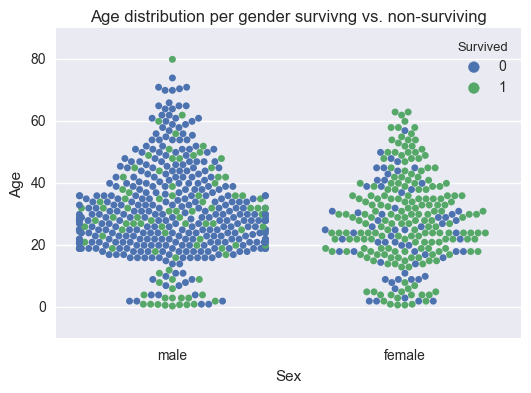

In [9]:
ax = sns.swarmplot(x="Sex", y="Age", data=titanic_data_full_Age, hue="Survived")
plt.title("Age distribution per gender survivng vs. non-surviving")
plt.show()

So far it seems like the crew might have effectively applied the "women and children first" policy, but was it followed for all classes?

Let's will first have a look at the survival rates per class.

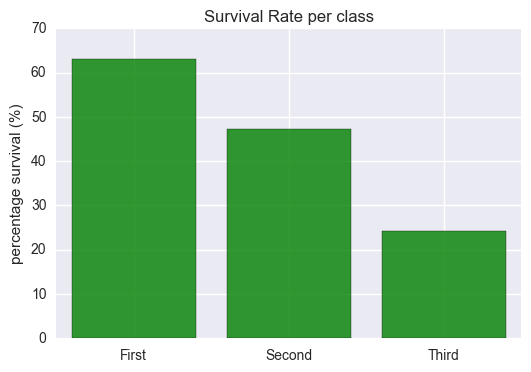

In [10]:
#Let's see the survival counts and percentages per class
"""
# overall count
xval=titanic_data.groupby('Pclass',as_index=False).sum()['Pclass']
yval=titanic_data.groupby('Pclass',as_index=False).count()['Survived']
plt.bar(xval-0.4, yval, alpha=0.8, color='grey')
plt.xticks(xval, lables)
plt.title("Count of pessenger per class")
plt.ylabel("Pessengers (n)")
plt.show()

# survival counts
xval=titanic_data.groupby('Pclass',as_index=False).sum()['Pclass']
yval=titanic_data.groupby('Pclass',as_index=False).sum()['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='blue')
plt.xticks(xval, lables)
plt.title("Survivals per class")
plt.ylabel("Pessengers (n)")
plt.show()"""

# by survival percentage
xval=titanic_data.groupby('Pclass',as_index=False).sum()['Pclass']
yval=100*titanic_data.groupby('Pclass',as_index=False).sum()['Survived']/titanic_data.groupby('Pclass',as_index=False).count()['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='green')
plt.xticks(xval, lables)
plt.title("Survival Rate per class")
plt.ylabel("percentage survival (%)")
plt.show()

We may assume that due to the location of the third class, it was difficult for third-class passengers to reach the lifeboats, that’s why the survival rates were less for third class. However, for second class survival percentages to be lower than first class, this needs a deeper look. 

In order to have deeper undrestanding we will need to breakdown the survival rates over each class per gender. It seems that survival rates for women were quite high for females of both first and second class, while third class female survival rate was below 50%, this might be due to third class location as mentioned before. Still we can see that first-class male passengers had higher survival rates than males from second and third classes.

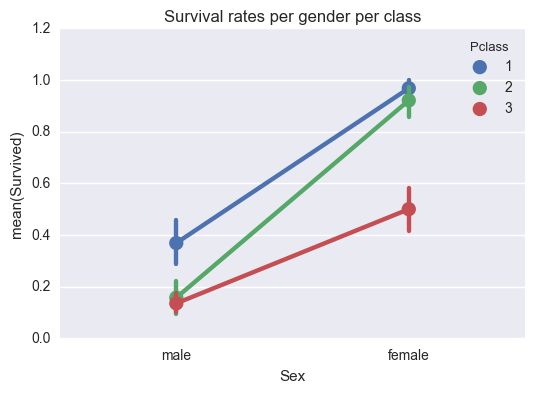

In [11]:
sns.pointplot(x="Sex",y="Survived", hue="Pclass", data=titanic_data)
plt.title("Survival rates per gender per class")
plt.show()

Why do we have higher survival rates for first class males? It could be that among first class passengers there were more males in the "children" than second and third class, so let's have a deeper look.

For this we will need to identify women and children category. We will consider any one of 12 or below to be in the children category. Why 12? because In 1901, the permissible child labor age was raised to 12 [[source: wikipedia](https://en.wikipedia.org/wiki/History_of_childhood#Children.27s_rights_under_the_law)], so this could be a socially accepted definition for childhood at this time. Let's **assume** the crew considered any passenger below around 12 years to be a child.

We will **adjust** the data (adding isWomanOrChild, and identifier for women and children), and re-plot the charts, taking children into consideration

In [12]:
# to ignore warning in next cell, after some research the warning can be ingnored.
import warnings
warnings.filterwarnings('ignore')

In [13]:
#We will create column **isWomanOrChild** which is a boolean giving true if sex = female or Age below  12
titanic_data_full_Age['isWomanOrChild']=(titanic_data_full_Age['Sex_numeric']==1)|(titanic_data_full_Age['Age']<=12)

In [14]:
titanic_data_full_Age.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Id,Sex_numeric,isWomanOrChild
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,True
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1,True


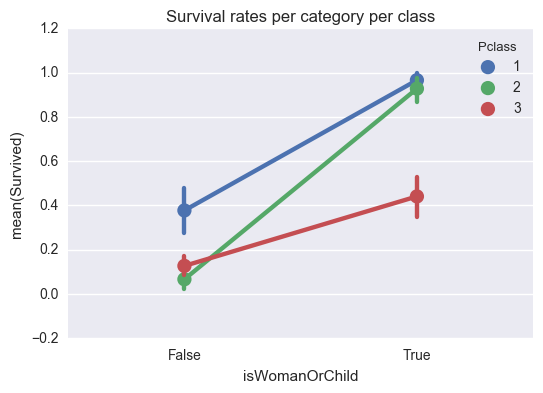

In [15]:
sns.pointplot(x="isWomanOrChild",y="Survived", hue="Pclass", data=titanic_data_full_Age)
plt.title("Survival rates per category per class")
plt.show()

***Even*** after accounting for children, first class men survival rate is higher than second and third-class, this leaves a question mark on how the crew handled the situation, after embarking as much women and children as they could.

now back to another question: Were first class more likely to survive than third class women and children?

Below bar chart shows that third class women and children survival rate was slightly higher than first class men. It is however not a big difference. If we compare this ratio with survival rate for women and children in general the ratio is quite low.

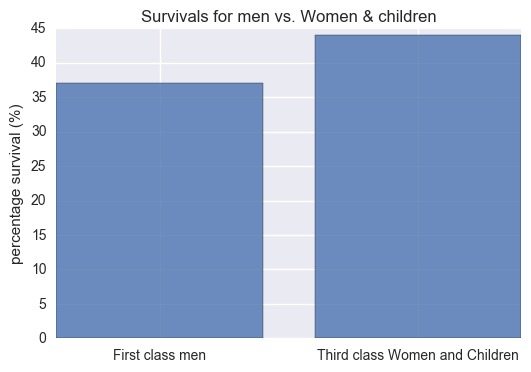

In [16]:
#bar plots for women and children of third class vs men of first class
titanicAge_by_category_class_sum=titanic_data_full_Age.groupby(['isWomanOrChild','Pclass'], as_index=False).sum()
titanicAge_by_category_class_count=titanic_data_full_Age.groupby(['isWomanOrChild','Pclass'], as_index=False).count()

third_class_women_children_survival_rate=(100*titanicAge_by_category_class_sum.iloc[5,2]\
                                          /titanicAge_by_category_class_count.iloc[5,2])

first_class_men_survival_rate=(100*titanicAge_by_category_class_sum.iloc[0,2]\
                                          /titanicAge_by_category_class_count.iloc[0,2])
xval=np.array([0,1])
yval=np.array([first_class_men_survival_rate,third_class_women_children_survival_rate])
lables=["First class men","Third class Women and Children"]
plt.bar(xval-0.4, yval, alpha=0.8)
plt.xticks(xval, lables)
plt.ylabel("percentage survival (%)")
plt.title("Survivals for men vs. Women & children")
plt.show()


***Now*** for the last question, let's see if fare had any impact on survival rate. We will look at the distribution of fare for surviving and non-surviving pessengers for males and females separately. It is not very clear whether there is difference in fare distribution between surviving and non-surviving pessenger

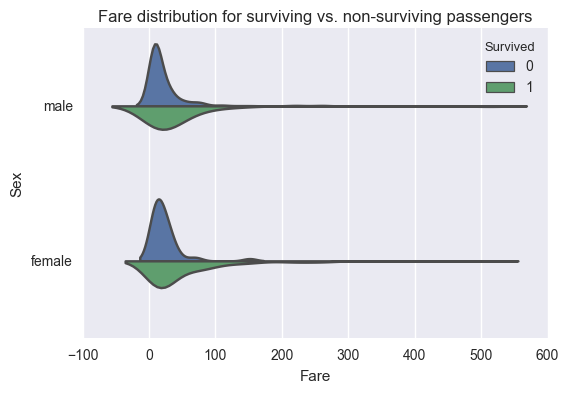

In [17]:
sns.violinplot(x="Fare", y="Sex", data=titanic_data, inner=None, hue='Survived', split=True)
plt.title("Fare distribution for surviving vs. non-surviving passengers")
plt.show()

To make the picture more clear, we removed few extreme data points (outliers) with very high fare. Things now looks more clear. For non-surviving male pessengers, the mean of passenger fare seems different from surviving pessengers, indicating the presence of relationship between survival and fare. However, we need statistical tests to confirm relationship.

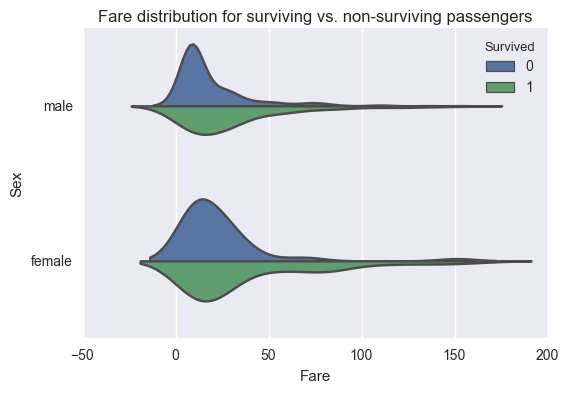

In [18]:
Titanic_data_wo_Fare_outliers=titanic_data[titanic_data["Fare"]<200]
ax=sns.violinplot(x="Fare", y="Sex", data=Titanic_data_wo_Fare_outliers, inner=None, hue='Survived', split=True)
plt.title("Fare distribution for surviving vs. non-surviving passengers")
plt.show()

## Let's test the results statistically

we have already visualized the data to draw an initial idea about it, but we need to draw a conclusion. For this we will do some statistical analysis addressing each question we asked earlier.

for the first three questions, we will use a non-parametric test (Chi-square test for independence of variables) since the variables of interest are all categorical. The null hypothesis will be that the set of two variables (survival versus the other variable) are actually independent.

for the last question regarding passenger fare, we will use a t-test for two independent samples (the two samples are the surviving and non-surviving sample).

Let's start with the first two questions:

In [19]:
#create a function for Chi-squared testing for independence of variables
#Note: After defining the function I figured out that there is an existing function in scipy (chi2_contingency) doing the same
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html

def chi_square_test(dataframe, variable1, variable2, alpha):
    """I defined this function since we will do three chi-square tests, so it is easier to do one function. some lines in the
    functions were inspired by Hamelg blog (life is a post) link in the comments above. 
    the function takes dataframe, two variables, and alpha values as an input, and returns the chis square test statistics:
    Chi-squared, chi-squared critical for the input alpha value, the p value"""

# calculating the frequency table given the inputs

    dataframe_count=dataframe.groupby([variable1,variable2],as_index=False).count()
    pivot=dataframe_count.pivot(index=variable1,columns=variable2, values='Name')  
    row_sum=pivot.sum()
    col_sum=pivot.apply(sum,axis=1)

    # calculating expected values
    expected_value=[]
    expected_value_df=pd.DataFrame([])
    for row_val in row_sum:
        expected_value=[]
        for col_val in col_sum:
            expected_value.append(float(row_val)*col_val/row_sum.sum())
        expected_value_df[row_val]=expected_value
        
    #chi square calculation
    expected_value_df.columns=pivot.columns
    expected_value_df.index=pivot.index
    chisquare_matrix=((pivot-expected_value_df)**2)/expected_value_df
    chisquare=chisquare_matrix.values.sum()

    # the following lines will do the hypothesis testing for alpha=0.05
    chi_crit=stats.chi2.ppf(q=1-alpha, df=(len(row_sum)-1)*(len(col_sum)-1))
    p_value = (1-stats.chi2.cdf(x=chisquare, df=(len(row_sum)-1)*(len(col_sum)-1)))
    
    # communicating the results
    if chisquare > chi_crit:
        result='statistically significant'
        Null_hyp='reject'
        dependence='dependent'
    else:
        result='not statistically significant'
        Null_hyp='Fail to reject'
        dependence='independent'
    if p_value==0.0:
        P_val_str = '< .00001'
    else:
        P_val_str = '= '+str(p_value)

    print "-------------------------------------------------------------------------------------------"
    print str(variable1) +", "+ str(variable2)+":"
    print 'The chi-square statistic is = '+str(chisquare)+', The critical chi-square = '+str(chi_crit)+' at alpha = '+str(alpha)\
    +'. The p-value is '+P_val_str+"."
    print 'The result is '+ result+ ' at alpha ='+str(alpha)+" , and we "+Null_hyp+\
    " the null hypothesis. There is enough evidence to say that the two variables of interest("+str(variable1) \
    +", "+ str(variable2)+ ") are "+ dependence +" at this alpha level."
    print "-------------------------------------------------------------------------------------------"
    print \

# calling the function
chi_square_test(titanic_data_full_Age,'Survived','isWomanOrChild',0.01)
chi_square_test(titanic_data_full_Age,'Survived','Pclass',0.01)

-------------------------------------------------------------------------------------------
Survived, isWomanOrChild:
The chi-square statistic is = 224.511462164, The critical chi-square = 6.63489660102 at alpha = 0.01. The p-value is < .00001.
The result is statistically significant at alpha =0.01 , and we reject the null hypothesis. There is enough evidence to say that the two variables of interest(Survived, isWomanOrChild) are dependent at this alpha level.
-------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------
Survived, Pclass:
The chi-square statistic is = 92.9014172114, The critical chi-square = 9.21034037198 at alpha = 0.01. The p-value is < .00001.
The result is statistically significant at alpha =0.01 , and we reject the null hypothesis. There is enough evidence to say that the two variables of interest(Survived, Pclass) are dependent at this alpha 

***We could see*** that the statistical tests are supporting our initial observation. Indeed, both being woman or child, and passenger class have relationship with survival rate.

Now, for the third question. In the below results, isWomanOrChild represents 3rd class women and children if True, and if False it represents 1st class men. 

What if the survival is independent on this variable? does this mean that the crew did not tend to give priority to third class women and children over first class men?

The answer is, we cannot really know for sure, at the end ***correlation does not imply causation***. As mentioned before, there might actually be a lurking variable (like time of arrival of passengers to boats, or whether the passengers arrived to the boats at all), which is not available for data in hand. 

In [20]:
# to run Chi-square test for the third question (1st class men vs 3rd class women and children survival), we will first need 
# to create a new dataframe containing only this categories, then apply chi-square test
titanic_data_category=\
titanic_data_full_Age[((titanic_data_full_Age['isWomanOrChild']==True) & (titanic_data_full_Age['Pclass']==3))\
                                            |((titanic_data_full_Age['isWomanOrChild']==False) & (titanic_data_full_Age['Pclass']==1))]

chi_square_test(titanic_data_category,'Survived','isWomanOrChild',0.05)

-------------------------------------------------------------------------------------------
Survived, isWomanOrChild:
The chi-square statistic is = 0.916747740267, The critical chi-square = 3.84145882069 at alpha = 0.05. The p-value is = 0.338330360947.
The result is not statistically significant at alpha =0.05 , and we Fail to reject the null hypothesis. There is enough evidence to say that the two variables of interest(Survived, isWomanOrChild) are independent at this alpha level.
-------------------------------------------------------------------------------------------



***Indeed*** the survival rate seems to be independent on whether the passengers were first class men, or third-class women and children. This leaves us with another question mark.

***Now***, let's do the testing for the last question
Is there any relation between passenger fare and the survival rate? in other words, is the fare mean/distribution different for surviving and non-surviving passengers?

for this we will do two independent samples t-test, and check the mean difference.

we will ignore the normality assumption since the sample size is quite larger than 30.

In [21]:
Survivng_Passengers=titanic_data[titanic_data['Survived']==1]
non_Survivng_Passengers=titanic_data[titanic_data['Survived']==0]
surviving_Fair=Survivng_Passengers['Fare']
non_surviving_Fair=non_Survivng_Passengers['Fare']
surviving_males_Fare=Survivng_Passengers[Survivng_Passengers["Sex_numeric"]==0]['Fare']
non_surviving_males_Fare=non_Survivng_Passengers[non_Survivng_Passengers["Sex_numeric"]==0]['Fare']
surviving_female_Fare=Survivng_Passengers[Survivng_Passengers["Sex_numeric"]==1]['Fare']
non_surviving_female_Fare=non_Survivng_Passengers[non_Survivng_Passengers["Sex_numeric"]==1]['Fare']

print "-------------------------------------------------------------------------------------------"
print "t-statistics for all pessengers: " + str(stats.ttest_ind(a=surviving_Fair,b=non_surviving_Fair))
print "t-statistics for male pessengers: "+ str (stats.ttest_ind(a=surviving_males_Fare,b=non_surviving_males_Fare))
print "t-statistics for female pessengers: "+ str (stats.ttest_ind(a=surviving_female_Fare,b=non_surviving_female_Fare))
print "-------------------------------------------------------------------------------------------"
print \


-------------------------------------------------------------------------------------------
t-statistics for all pessengers: Ttest_indResult(statistic=7.9391916608710549, pvalue=6.1201893419241981e-15)
t-statistics for male pessengers: Ttest_indResult(statistic=4.1689593189769596, pvalue=3.5315466859845287e-05)
t-statistics for female pessengers: Ttest_indResult(statistic=3.954397947458725, pvalue=9.4993808518606669e-05)
-------------------------------------------------------------------------------------------



***It seems*** that the distribution of fair is significantly different for surviving and non-surviving passengers.

Again, there might be a lurking variable (which is probably the passenger class), since lower passenger class tends to be cheaper. And again, the fact that the third-class passengers were further away from the boats might be the main cause factor.


## Conclusion

We learned many lessons from the Titanic sinking, and still to learn. But the main lesson is to get rid of our human arrogance, and design risk plans on worst case scenario to avoid disasters, or manage them the best possible way. Have there been enough boats to save majority of the Titanic passengers, the situation would have been much better. If proper risk management plans were put during the design phase, third-class passengers would not have had to go through mazes of corridors and staircases to reach the lifeboats. But people implicitly, if not explicitly, believed the Titanic was unsinkable. This is the main mistake, we over-estimated the limits of technology.

Throughout this analysis efforts, we tried to dig deeper into how the evacuation of the titanic was managed. It seems that Captain Smith and titanic crew did the best they could do to board women and children first, and it proved to be effective across all classes. However, there remains a question on how the crew handled the situation after saving as much women and children as possible.

By correlating the data, it seems first class men were more likely to survive than second and third-class men. Of course this doesn't essentially mean that the crew gave priority to people according to their class, at the end ***correlation does not imply causation***. I believe however, this is the part were efforts should be focused to ensure people are treated fairly in such situation.


Even the "women and children first" policy has no basis in maritime law. However, People will usually help the most vulnerable to leave the scene first, likely to be the injured, elderly and young children. This policy is considered the unwritten law of the sea

The question is, should there be a clear written protocol for passenger priority in ship evacuation? or it should be left for human nature to decide? should crew always be practically trained on (not just aware of) such protocols?

Answering this question might be a key to prevent a future disaster from happening, or at least save more lives in case of disasters.


## References
[1] Titanic data on Kaggle website: (https://www.kaggle.com/c/titanic/data)

[2] Sinkking of Titanic, painting by *Willy Stöwer* (https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

[3] List of maritime disasters in the 20th century, Wikipedia (https://en.wikipedia.org/wiki/List_of_maritime_disasters_in_the_20th_century#Notable_disasters)

[4] HTML code for toggle on/off code cells, from Stack Overflow post by user *harshil* (https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer/28073228#28073228)

[5] Code to hide warnings, Stack Overflow post by user *astrofrog* (https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython)

[6] *Hamlg* blog,  Life Is Study  (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html)

[7] History of childhood, Wikipedia (https://en.wikipedia.org/wiki/History_of_childhood#Children.27s_rights_under_the_law)

[8] Women and children first, Wikipedia (https://en.wikipedia.org/wiki/Women_and_children_first)
